In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
abbrevs = pd.read_csv("state-abbrevs.csv")
areas = pd.read_csv("state-areas.csv")
population = pd.read_csv("state-population.csv")

In [124]:
print("The current installed versiob of pandas is ",pd.__version__)

The current installed versiob of pandas is  2.2.2


In [126]:
# Pandas exist either as Series (1-D) or Dataframes (n-dimension)
# Exemple :
series = pd.Series([1,4,6,7])

In [190]:
# by default the index starts with 0, and increments by 1
series

0    1
1    4
2    6
3    7
dtype: int64

In [188]:
[num if (num%2 == 0) else '' for num in series]

['', 4, 6, '']

In [192]:
# Changing the default index
series_index = pd.Series([1,4,6,7], index=['a','b','c','d'])
series_index   

a    1
b    4
c    6
d    7
dtype: int64

In [194]:
series_index['b']

4

In [170]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [13]:
population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [31]:
merged  = pd.merge(population, abbrevs, left_on="state/region", right_on="abbreviation")
print(merged)

     state/region     ages  year  population    state abbreviation
0              AL  under18  2012   1117489.0  Alabama           AL
1              AL    total  2012   4817528.0  Alabama           AL
2              AL  under18  2010   1130966.0  Alabama           AL
3              AL    total  2010   4785570.0  Alabama           AL
4              AL  under18  2011   1125763.0  Alabama           AL
...           ...      ...   ...         ...      ...          ...
2443           WY  under18  1993    137458.0  Wyoming           WY
2444           WY    total  1991    459260.0  Wyoming           WY
2445           WY  under18  1991    136720.0  Wyoming           WY
2446           WY  under18  1990    136078.0  Wyoming           WY
2447           WY    total  1990    453690.0  Wyoming           WY

[2448 rows x 6 columns]


In [33]:
# check if any column contains null data
merged.isnull().any()

state/region    False
ages            False
year            False
population      False
state           False
abbreviation    False
dtype: bool

In [61]:
# Retrieving all records greater than 2010
allYearAfter2010 = merged[merged["year"] > 2010]

In [63]:
print(allYearAfter2010)

     state/region     ages  year  population    state abbreviation
0              AL  under18  2012   1117489.0  Alabama           AL
1              AL    total  2012   4817528.0  Alabama           AL
4              AL  under18  2011   1125763.0  Alabama           AL
5              AL    total  2011   4801627.0  Alabama           AL
8              AL  under18  2013   1111481.0  Alabama           AL
...           ...      ...   ...         ...      ...          ...
2401           WY  under18  2012    136526.0  Wyoming           WY
2402           WY    total  2011    567329.0  Wyoming           WY
2403           WY  under18  2011    135407.0  Wyoming           WY
2408           WY    total  2013    582658.0  Wyoming           WY
2409           WY  under18  2013    137679.0  Wyoming           WY

[306 rows x 6 columns]


In [65]:
print(f"The number of records for greater than 2010 is {len(allYearAfter2010)}")

The number of records for greater than 2010 is 306


In [87]:
# Retrieving all records greater than 2010 and from Alabama states only
allYearAfter2010Ala = merged[(merged["year"] > 2010) & (merged["state"] == 'Alabama')]

In [89]:
print(allYearAfter2010Ala)

  state/region     ages  year  population    state abbreviation
0           AL  under18  2012   1117489.0  Alabama           AL
1           AL    total  2012   4817528.0  Alabama           AL
4           AL  under18  2011   1125763.0  Alabama           AL
5           AL    total  2011   4801627.0  Alabama           AL
8           AL  under18  2013   1111481.0  Alabama           AL
9           AL    total  2013   4833722.0  Alabama           AL


In [99]:
# Retrieving all records greater than 2010 and from Alabama & Wyoming states only
allYearAfter2010AlaAndWyo = merged[(merged["year"] > 2010) & ((merged["state"] == 'Alabama') | (merged["state"] == 'Wyoming'))]

In [101]:
print(allYearAfter2010AlaAndWyo)

     state/region     ages  year  population    state abbreviation
0              AL  under18  2012   1117489.0  Alabama           AL
1              AL    total  2012   4817528.0  Alabama           AL
4              AL  under18  2011   1125763.0  Alabama           AL
5              AL    total  2011   4801627.0  Alabama           AL
8              AL  under18  2013   1111481.0  Alabama           AL
9              AL    total  2013   4833722.0  Alabama           AL
2400           WY    total  2012    576626.0  Wyoming           WY
2401           WY  under18  2012    136526.0  Wyoming           WY
2402           WY    total  2011    567329.0  Wyoming           WY
2403           WY  under18  2011    135407.0  Wyoming           WY
2408           WY    total  2013    582658.0  Wyoming           WY
2409           WY  under18  2013    137679.0  Wyoming           WY


In [103]:
print(len(allYearAfter2010AlaAndWyo))

12


In [119]:
# Retrieving all records greater than 2010 and from Alabama & Wyoming states only with the Year, Population and state only
records2010AlaAndWyo = merged[(merged["year"] > 2010) & ((merged["state"] == 'Alabama') | (merged["state"] == 'Wyoming'))].iloc[:,1:4]

In [121]:
print(records2010AlaAndWyo)

         ages  year  population
0     under18  2012   1117489.0
1       total  2012   4817528.0
4     under18  2011   1125763.0
5       total  2011   4801627.0
8     under18  2013   1111481.0
9       total  2013   4833722.0
2400    total  2012    576626.0
2401  under18  2012    136526.0
2402    total  2011    567329.0
2403  under18  2011    135407.0
2408    total  2013    582658.0
2409  under18  2013    137679.0


In [140]:
# Retrieving the sum of the population as from year 2010 and from Alabama & Wyoming states
averagePopAlaWyom = merged[(merged["year"] > 2010) & ((merged["state"] == 'Alabama') | (merged["state"] == 'Wyoming'))].iloc[:,3].mean()

In [142]:
print(f"The average population for Alabama and Wyoming as from Year 2010 is {averagePopAlaWyom}")

The average population for Alabama and Wyoming as from Year 2010 is 1661986.25


In [158]:
# We can also use query to perform search
usingQuery = merged.query("year > 2010")

In [160]:
print(usingQuery)

     state/region     ages  year  population    state abbreviation
0              AL  under18  2012   1117489.0  Alabama           AL
1              AL    total  2012   4817528.0  Alabama           AL
4              AL  under18  2011   1125763.0  Alabama           AL
5              AL    total  2011   4801627.0  Alabama           AL
8              AL  under18  2013   1111481.0  Alabama           AL
...           ...      ...   ...         ...      ...          ...
2401           WY  under18  2012    136526.0  Wyoming           WY
2402           WY    total  2011    567329.0  Wyoming           WY
2403           WY  under18  2011    135407.0  Wyoming           WY
2408           WY    total  2013    582658.0  Wyoming           WY
2409           WY  under18  2013    137679.0  Wyoming           WY

[306 rows x 6 columns]


In [162]:
# We can also use query to perform search...get the last records
usingQueryTail = merged.query("year > 2010").tail()
print(usingQueryTail)

     state/region     ages  year  population    state abbreviation
2401           WY  under18  2012    136526.0  Wyoming           WY
2402           WY    total  2011    567329.0  Wyoming           WY
2403           WY  under18  2011    135407.0  Wyoming           WY
2408           WY    total  2013    582658.0  Wyoming           WY
2409           WY  under18  2013    137679.0  Wyoming           WY


In [5]:
import seaborn as sns
planets = sns.load_dataset('planets') 
planets.shape

(1035, 6)

In [7]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [12]:
# Retrieving the first set of head and tail records
pd.concat([planets.head(), planets.tail()])

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008
1034,Transit,1,4.187757,NaN,260.00,2008


In [14]:
# Give a full description of all columns
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [16]:
# Calculate the mean distance 
planets["distance"].mean()

264.06928217821786

In [18]:
print(planets.groupby("method").mean())

                                 number  orbital_period      mass  \
method                                                              
Astrometry                     1.000000      631.180000       NaN   
Eclipse Timing Variations      1.666667     4751.644444  5.125000   
Imaging                        1.315789   118247.737500       NaN   
Microlensing                   1.173913     3153.571429       NaN   
Orbital Brightness Modulation  1.666667        0.709307       NaN   
Pulsar Timing                  2.200000     7343.021201       NaN   
Pulsation Timing Variations    1.000000     1170.000000       NaN   
Radial Velocity                1.721519      823.354680  2.630699   
Transit                        1.954660       21.102073  1.470000   
Transit Timing Variations      2.250000       79.783500       NaN   

                                  distance         year  
method                                                   
Astrometry                       17.875000  2011.500000

In [20]:
# Retrieving only the mass and distance columns
print(planets.groupby("method").mean().loc[:, ["mass","distance"]])

                                   mass     distance
method                                              
Astrometry                          NaN    17.875000
Eclipse Timing Variations      5.125000   315.360000
Imaging                             NaN    67.715937
Microlensing                        NaN  4144.000000
Orbital Brightness Modulation       NaN  1180.000000
Pulsar Timing                       NaN  1200.000000
Pulsation Timing Variations         NaN          NaN
Radial Velocity                2.630699    51.600208
Transit                        1.470000   599.298080
Transit Timing Variations           NaN  1104.333333


In [22]:
# get the mean of distance for all methods
print(planets.groupby("method")["distance"].mean())

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
Name: distance, dtype: float64


In [24]:
# Let us say we want to apply a given function to all the distance (ex multiply by 2 and add to 100
# then we can use lambda
print(planets.groupby("method")["distance"].mean().transform(lambda x: (x*2) + 100))

method
Astrometry                        135.750000
Eclipse Timing Variations         730.720000
Imaging                           235.431875
Microlensing                     8388.000000
Orbital Brightness Modulation    2460.000000
Pulsar Timing                    2500.000000
Pulsation Timing Variations              NaN
Radial Velocity                   203.200415
Transit                          1298.596161
Transit Timing Variations        2308.666667
Name: distance, dtype: float64


In [26]:
# if the lambda function to be applied is more complex then we can simply write a function
# for example, adding a given if 

def logic(x):
    if x < 100:
        return (x * 2) + 100
    else:
        return x * 2

print(planets.groupby("method")["distance"].mean().apply(logic))

method
Astrometry                        135.750000
Eclipse Timing Variations         630.720000
Imaging                           235.431875
Microlensing                     8288.000000
Orbital Brightness Modulation    2360.000000
Pulsar Timing                    2400.000000
Pulsation Timing Variations              NaN
Radial Velocity                   203.200415
Transit                          1198.596161
Transit Timing Variations        2208.666667
Name: distance, dtype: float64


In [28]:
# Using the previous example by filling null values by 0
print(planets.groupby("method")["distance"].mean().apply(logic).fillna(0))

method
Astrometry                        135.750000
Eclipse Timing Variations         630.720000
Imaging                           235.431875
Microlensing                     8288.000000
Orbital Brightness Modulation    2360.000000
Pulsar Timing                    2400.000000
Pulsation Timing Variations         0.000000
Radial Velocity                   203.200415
Transit                          1198.596161
Transit Timing Variations        2208.666667
Name: distance, dtype: float64


In [30]:
decade = 10 * (planets['year'] // 10)
print(decade)

0       2000
1       2000
2       2010
3       2000
4       2000
        ... 
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64


In [76]:
# decadeUnique = (planets['year'] // 10).unique() * 10
decadeUnique = (planets['year'] // 10) * 10
decadeUnique = decadeUnique.astype(str) + 's'
print(decadeUnique)

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object


In [90]:
# Displaying all methods by year (with their number summed up)
planetsByMethodAndYear = planets.groupby(["method",decadeUnique])['number'].sum().unstack().fillna(0)

In [92]:
planetsByMethodAndYear

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [94]:
# Loading the titanic dataset
titanic = sns.load_dataset('titanic')

In [96]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
[print(val) for val in titanic.groupby('sex')]

('female',      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
8           1       3  female  27.0      0      2  11.1333        S   Third   
9           1       2  female  14.0      1      0  30.0708        C  Second   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
880         1       2  female  25.0      0      1  26.0000        S  Second   
882         0       3  female  22.0      0      0  10.5167        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town

[None, None]

In [134]:
# Getting the total no. of people by gender in the dataset
titanic.groupby('sex')[['survived']].sum()

,survived
sex,
female,233
male,109


In [142]:
# Getting the total no. of people by gender in the dataset; unstack allows the class to be displayed in columns
# otherwise, it will be displayed on rows (stacked by default)
titanic.groupby(['sex', 'class'])[['survived']].sum().unstack()

/var/folders/wd/v7wcs7rs2pndc5xkyyt016hw0000gn/T/ipykernel_1113/1946876174.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])[['survived']].sum().unstack()


survived             
class     First Second Third
sex                         
female       91     70    72
male         45     17    47

In [152]:
# doing the same as above using the pivot_table function
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum')

/var/folders/wd/v7wcs7rs2pndc5xkyyt016hw0000gn/T/ipykernel_1113/3560869452.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum')


class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [176]:
# listing the details by age group for gender, class and survived
age_groups = pd.cut(titanic['age'],[0,20,40,70])

In [178]:
titanic.pivot_table('survived',['sex', age_groups], 'class', aggfunc='sum')

/var/folders/wd/v7wcs7rs2pndc5xkyyt016hw0000gn/T/ipykernel_1113/2407405952.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived',['sex', age_groups], 'class', aggfunc='sum')


class            First  Second  Third
sex    age                           
female (0, 20]      13      16     24
       (20, 40]     44      41     22
       (40, 70]     25      11      1
male   (0, 20]       4      10     15
       (20, 40]     22       3     21
       (40, 70]     13       2      2

In [180]:
births = pd.read_csv("births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [194]:
# displaying the number of births per gender
births.groupby("gender")["births"].sum()

gender
F    74035823
M    77738555
Name: births, dtype: int64

In [196]:
# displaying the number of births per gender per year 
births.groupby(["gender", "year"])["births"].sum()

gender  year
F       1969    1753634
        1970    1819164
        1971    1736774
        1972    1592347
        1973    1533102
                 ...   
M       2004    2108197
        2005    2122727
        2006    2188268
        2007    2212118
        2008    2177227
Name: births, Length: 80, dtype: int64

In [210]:
year = 10 * (births["year"] // 10)

In [212]:
year

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15542    2000
15543    2000
15544    2000
15545    2000
15546    2000
Name: year, Length: 15547, dtype: int64

In [218]:
# displaying the number of births per gender per decade 
births.groupby(["gender", year])["births"].sum().unstack()

year,1960,1970,1980,1990,2000
gender,,,,,
F,1753634,16263075,18310351,19479454,18229309
M,1846572,17121550,19243452,20420553,19106428


In [222]:
# displaying the number of births per gender per decade  using pivot_table
births.pivot_table("births", index="gender", columns=year, aggfunc='sum')

year,1960,1970,1980,1990,2000
gender,,,,,
F,1753634,16263075,18310351,19479454,18229309
M,1846572,17121550,19243452,20420553,19106428


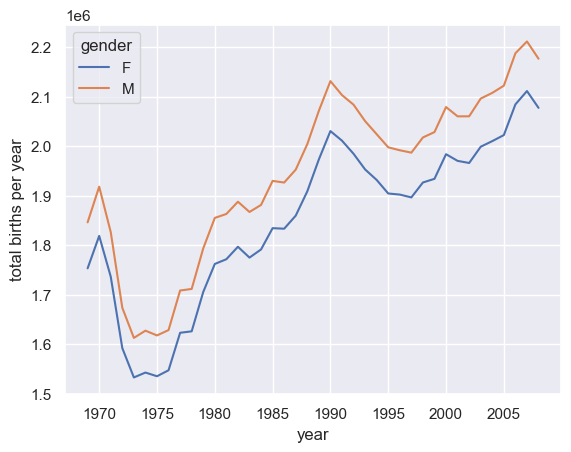

In [230]:
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [26]:
# Perfoming vectorise operations in python using pandas

str = np.array(['ackbar','amar',None,'anthony'])
str

array(['ackbar', 'amar', None, 'anthony'], dtype=object)

In [28]:
strCaps = [s.capitalize() for s in str]  # does not work as we have None value

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [45]:
str_pd = pd.Series(['ackbar','amar',None,'anthony'])

In [53]:
str_pd.str.capitalize()

0     Ackbar
1       Amar
2       None
3    Anthony
dtype: object

In [61]:
# display the number of characters in each string
str_pd.str.len()

0    6.0
1    4.0
2    NaN
3    7.0
dtype: float64

In [79]:
[s for s in str_pd]

['ackbar', 'amar', None, 'anthony']

In [81]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                              'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [83]:
[s for s in monte]

['Graham Chapman',
 'John Cleese',
 'Terry Gilliam',
 'Eric Idle',
 'Terry Jones',
 'Michael Palin']

In [87]:
[s.split(" ") for s in monte]

[['Graham', 'Chapman'],
 ['John', 'Cleese'],
 ['Terry', 'Gilliam'],
 ['Eric', 'Idle'],
 ['Terry', 'Jones'],
 ['Michael', 'Palin']]

In [91]:
[s.split(" ")[0] for s in monte]

['Graham', 'John', 'Terry', 'Eric', 'Terry', 'Michael']

In [115]:
# Printing the number of characters in each last word of each entry
[print(f"{s.split(" ")[-1] :>10}:  {len(s.split(" ")[0])} characters") for s in monte]

   Chapman:  6 characters
    Cleese:  4 characters
   Gilliam:  5 characters
      Idle:  4 characters
     Jones:  5 characters
     Palin:  7 characters


[None, None, None, None, None, None]